# Tarea #2 Statistical Learning

In [348]:
import numpy as np 
import tensorflow.compat.v1 as tf 
import matplotlib.pyplot as plt 
datos = np.load('proyecto_training_data.npy')
%load_ext tensorboard

In [335]:
data = datos[:,0:2]
print(data)

[[2.08500e+05 7.00000e+00]
 [1.81500e+05 6.00000e+00]
 [2.23500e+05 7.00000e+00]
 ...
 [2.66500e+05 7.00000e+00]
 [1.42125e+05 5.00000e+00]
 [1.47500e+05 5.00000e+00]]


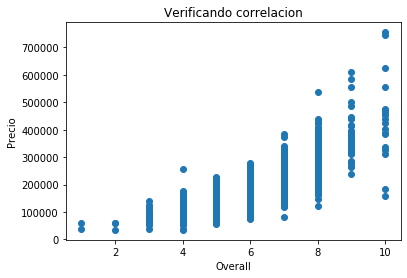

In [147]:
plt.scatter(data[:,1], data[:,0]) 
plt.xlabel('Overall') 
plt.ylabel('Precio') 
plt.title("Verificando correlacion") 
plt.show() 

In [363]:
def linearModel(epochs, lr, data):
    tf.reset_default_graph()
    m, n = data.shape
    xdata_mas_uno = np.c_[np.ones((m, 1)), data[:,1]]
    X = tf.constant(xdata_mas_uno, dtype = tf.float32, name = 'X')
    Y = tf.constant(data[:,0].reshape(-1, 1), dtype = tf.float32, name = 'y')
    mb = tf.Variable(tf.random_uniform([n, 1], -1.0, 1.0), name = 'mb')
    yhat = tf.matmul(X, mb, name = 'yhat')
    error = 1/2*tf.reduce_mean(tf.square(tf.math.subtract(yhat , Y)), name = 'mse')
    grads = tf.gradients(error, mb)
    error_summary = tf.summary.scalar(name="MSE", tensor=error)
    newmb =  tf.subtract(mb ,tf.multiply(lr , grads[0] ))
    updatemb = tf.assign(mb, newmb)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        writer = tf.summary.FileWriter(('.graphs/graphs_'+str(lr)+str(epochs)), sess.graph)
        sess.run(init)
        for epoch in range(epochs):
            e_summary = sess.run(error_summary)
            if epoch % 1000 == 0:
                print('Epoch', epoch , 'MSE = ', error.eval())
            sess.run(updatemb)
            writer.add_summary(e_summary,epoch)
        print(mb.eval())

linearModel(10000,0.04,data)
linearModel(10000,0.03,data)
linearModel(10000,0.02,data)
linearModel(10000,0.01,data)
linearModel(10000,0.001,data)
linearModel(10000,0.003,data)
linearModel(10000,0.005,data)
linearModel(10000,0.007,data)
linearModel(10000,0.009,data)
linearModel(10000,0.0099,data)

Epoch 0 MSE =  19519472000.0
Epoch 1000 MSE =  1185915100.0
Epoch 2000 MSE =  1180586800.0
Epoch 3000 MSE =  1180469900.0
Epoch 4000 MSE =  1180467300.0
Epoch 5000 MSE =  1180467100.0
Epoch 6000 MSE =  1180467000.0
Epoch 7000 MSE =  1180467000.0
Epoch 8000 MSE =  1180467000.0
Epoch 9000 MSE =  1180467000.0
[[-96203.98 ]
 [ 45435.473]]
Epoch 0 MSE =  19520379000.0
Epoch 1000 MSE =  1194634200.0
Epoch 2000 MSE =  1181275100.0
Epoch 3000 MSE =  1180513400.0
Epoch 4000 MSE =  1180469900.0
Epoch 5000 MSE =  1180467500.0
Epoch 6000 MSE =  1180467100.0
Epoch 7000 MSE =  1180467000.0
Epoch 8000 MSE =  1180466600.0
Epoch 9000 MSE =  1180466600.0
[[-96203.2 ]
 [ 45435.35]]
Epoch 0 MSE =  19520303000.0
Epoch 1000 MSE =  1217293200.0
Epoch 2000 MSE =  1185925100.0
Epoch 3000 MSE =  1181276000.0
Epoch 4000 MSE =  1180587000.0
Epoch 5000 MSE =  1180485100.0
Epoch 6000 MSE =  1180470100.0
Epoch 7000 MSE =  1180467500.0
Epoch 8000 MSE =  1180467200.0
Epoch 9000 MSE =  1180467100.0
[[-96198.35 ]
 [ 454

# Grafo de TensorBoard
![image info](./grafo.png)

# Curva de aprendizaje para los modelos
![image info](./scalar.png)

# Conclusion
En el caso de las pruebas realizadas los hiperparametros con mejor resultado fueron
- Learning rate 0.03
- Numero de iteraciones 10000

Con los cuales se obtuvo un modelo de la siguiente forma

Y = 45435.35 X - 96203.2

Esto se apega al modelo obtenido en el proyecto anterior con sklear el cual fue el siguiente

Y = 45411.998779159156 X - 96469.57131873982